<a href="https://colab.research.google.com/github/YatharthAsthana/GITHUB-COMMANDS-Deployment/blob/master/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tweepy
import re
import pandas as pd
import numpy as np
!pip install praw
import praw
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Reddit API credentials
reddit = praw.Reddit(client_id='CF5EOmlCOrpL7qbc3GhxmA',
                     client_secret='zRq-FDzbq0xQ4gXGzZ_EmpdppbqxOg',
                     user_agent='StockSentimentAnalysis')

In [6]:
subreddit = reddit.subreddit('wallstreetbets')
posts = subreddit.search('GME', limit=1000)

In [7]:
# Store post data in DataFrame
posts_data = [[post.title, post.selftext, post.score, post.created_utc] for post in posts]
df_posts = pd.DataFrame(posts_data, columns=['Title', 'Body', 'Score', 'Created'])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [8]:
df_posts.to_csv('/content/stocks_posts.csv', index=False)


In [9]:
df = pd.read_csv('/content/stocks_posts.csv')

In [10]:
df

,Title,Body,Score,Created
0,Gme 5/17 yolo,NaN,1005,1.714681e+09
1,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209,1.612819e+09
2,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85,1.658715e+09
3,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396,1.727117e+09
4,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376,1.679439e+09
...,...,...,...,...
232,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290,1.615487e+09
233,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215,1.612303e+09
234,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635,1.611976e+09
235,GME 2/11,GME/Jim Cramer megathread,8942,1.613049e+09


In [11]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])
    return text

In [12]:
# Apply cleaning function to the dataset
df['Cleaned_Text'] = df['Title'].apply(clean_text)


In [13]:
df.to_csv('/content/cleaned_stock_tweets.csv', index=False)

In [14]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [15]:
df1=pd.read_csv('/content/cleaned_stock_tweets.csv')

In [16]:
df1

,Title,Body,Score,Created,Cleaned_Text
0,Gme 5/17 yolo,NaN,1005,1.714681e+09,gme yolo
1,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209,1.612819e+09,best gme gain porn weeks sold brokers blocking...
2,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85,1.658715e+09,whatever happened gme fiasco
3,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396,1.727117e+09,dead fucking baba brings new yolo
4,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376,1.679439e+09,gme gamestop earnings lets take closer look
...,...,...,...,...,...
232,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290,1.615487e+09,gme yolo update back shares roller coaster fun...
233,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215,1.612303e+09,gme liquidy drying causing share become volatile
234,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635,1.611976e+09,linus ran stream would x donations buy gme k r...
235,GME 2/11,GME/Jim Cramer megathread,8942,1.613049e+09,gme


In [17]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# Function to get sentiment scores
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

In [19]:
# Apply sentiment analysis
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment)

In [20]:
# Label sentiment as Positive, Negative, or Neutral
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [21]:
# Save results
df.to_csv('sentiment_stock_tweets.csv', index=False)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
# Count Vectorizer to find mentions of specific stocks
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
X = vectorizer.fit_transform(df['Cleaned_Text'])

In [24]:
# Identify words related to stocks
stock_words = ['AAPL', 'GOOGL', 'TSLA', 'GME']  # Add stock symbols here
mention_matrix = X[:, [vectorizer.vocabulary_.get(w.lower()) for w in stock_words if w.lower() in vectorizer.vocabulary_]]


In [25]:
# Optional: Topic modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [26]:
# Get top words per topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: ", " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [27]:
print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic #0:  gme yolo update jan selling feb earnings years mar im
Topic #1:  gme amc buying buy moon im holding lets today let
Topic #2:  gme megathread april thread january bought sell monday time robinhood
Topic #3:  gme th megathread february theyre like friday thursday gains asked
Topic #4:  gme megathread march retards holding pajama party sec new overnight


In [28]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [29]:
# Load sentiment data and stock price data
sentiment_df = pd.read_csv('/content/sentiment_stock_tweets.csv')
stock_price_df = pd.read_csv('/content/stocks_posts.csv')  # Assuming you have stock price data


In [30]:
# Merge data on time or another relevant feature
merged_df = pd.merge(sentiment_df, stock_price_df, on='Created')

In [31]:
print(stock_price_df.columns)

Index(['Title', 'Body', 'Score', 'Created'], dtype='object')


In [34]:
stock_price_df

,Title,Body,Score,Created
0,Gme 5/17 yolo,NaN,1005,1.714681e+09
1,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209,1.612819e+09
2,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85,1.658715e+09
3,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396,1.727117e+09
4,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376,1.679439e+09
...,...,...,...,...
232,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290,1.615487e+09
233,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215,1.612303e+09
234,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635,1.611976e+09
235,GME 2/11,GME/Jim Cramer megathread,8942,1.613049e+09


In [39]:
#stock_price_df['Stock_Price_Change'] = stock_price_df['Close'].pct_change()
merged_df.columns

Index(['Title_x', 'Body_x', 'Score_x', 'Created', 'Cleaned_Text',
       'Sentiment_Score', 'Sentiment_Label', 'Title_y', 'Body_y', 'Score_y'],
      dtype='object')

In [40]:
corr, _ = pearsonr(merged_df['Sentiment_Score'], merged_df['Score_x'])
print(f'Correlation between sentiment score and score x: {corr}')


Correlation between sentiment score and score x: 0.20104387758703318


In [43]:
corr1, _ = pearsonr(merged_df['Sentiment_Score'], merged_df['Created'])
print(f'Correlation between sentiment score and Created time: {corr1}')

Correlation between sentiment score and Created time: -0.14621917288771272


In [37]:
merged_df

,Title_x,Body_x,Score_x,Created,Cleaned_Text,Sentiment_Score,Sentiment_Label,Title_y,Body_y,Score_y
0,Gme 5/17 yolo,NaN,1005,1.714681e+09,gme yolo,0.2732,Positive,Gme 5/17 yolo,NaN,1005
1,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209,1.612819e+09,best gme gain porn weeks sold brokers blocking...,0.6908,Positive,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209
2,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85,1.658715e+09,whatever happened gme fiasco,-0.5106,Negative,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85
3,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396,1.727117e+09,dead fucking baba brings new yolo,-0.4939,Negative,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396
4,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376,1.679439e+09,gme gamestop earnings lets take closer look,0.0000,Neutral,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376
...,...,...,...,...,...,...,...,...,...,...
232,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290,1.615487e+09,gme yolo update back shares roller coaster fun...,0.9022,Positive,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290
233,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215,1.612303e+09,gme liquidy drying causing share become volatile,0.2960,Positive,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215
234,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635,1.611976e+09,linus ran stream would x donations buy gme k r...,0.0000,Neutral,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635
235,GME 2/11,GME/Jim Cramer megathread,8942,1.613049e+09,gme,0.0000,Neutral,GME 2/11,GME/Jim Cramer megathread,8942


In [38]:
df1

,Title,Body,Score,Created,Cleaned_Text
0,Gme 5/17 yolo,NaN,1005,1.714681e+09,gme yolo
1,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209,1.612819e+09,best gme gain porn weeks sold brokers blocking...
2,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85,1.658715e+09,whatever happened gme fiasco
3,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396,1.727117e+09,dead fucking baba brings new yolo
4,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376,1.679439e+09,gme gamestop earnings lets take closer look
...,...,...,...,...,...
232,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290,1.615487e+09,gme yolo update back shares roller coaster fun...
233,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215,1.612303e+09,gme liquidy drying causing share become volatile
234,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635,1.611976e+09,linus ran stream would x donations buy gme k r...
235,GME 2/11,GME/Jim Cramer megathread,8942,1.613049e+09,gme


In [32]:
print(merged_df.columns)

Index(['Title_x', 'Body_x', 'Score_x', 'Created', 'Cleaned_Text',
       'Sentiment_Score', 'Sentiment_Label', 'Title_y', 'Body_y', 'Score_y'],
      dtype='object')


In [36]:
df1

,Title,Body,Score,Created,Cleaned_Text
0,Gme 5/17 yolo,NaN,1005,1.714681e+09,gme yolo
1,"My best GME gain porn. $1,295 --> $959,663 in ...",NaN,45209,1.612819e+09,best gme gain porn weeks sold brokers blocking...
2,Whatever happened with the GME fiasco?,I tried searching this subreddit for some clos...,85,1.658715e+09,whatever happened gme fiasco
3,DEAD FUCKING BABA BRINGS YOU A NEW YOLO,NaN,1396,1.727117e+09,dead fucking baba brings new yolo
4,(GME) Gamestop earnings. Let's take a closer l...,**Gamestop (GME) Earnings Summary:**\n\n* EPS ...,9376,1.679439e+09,gme gamestop earnings lets take closer look
...,...,...,...,...,...
232,"GME YOLO UPDATE: BACK OVER $5,000,000! (20,000...",NaN,27290,1.615487e+09,gme yolo update back shares roller coaster fun...
233,GME liquidy is drying up - causing the share t...,[https://i.imgur.com/DxM4SwP.png](https://i.im...,19215,1.612303e+09,gme liquidy drying causing share become volatile
234,🚨🚀🚨 Linus just ran a stream where he would 5x ...,NaN,40635,1.611976e+09,linus ran stream would x donations buy gme k r...
235,GME 2/11,GME/Jim Cramer megathread,8942,1.613049e+09,gme


In [44]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

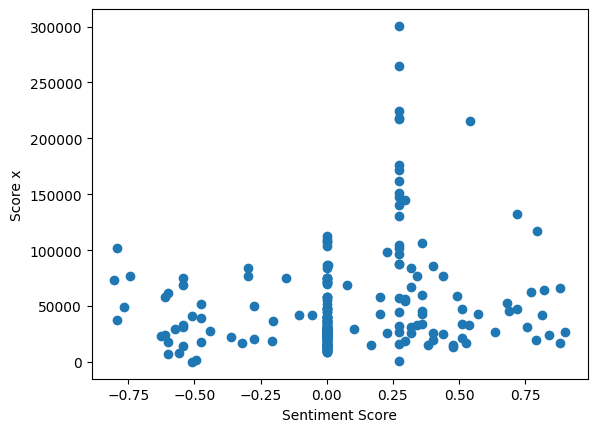

In [45]:
# Plot sentiment vs stock price change
plt.scatter(merged_df['Sentiment_Score'], merged_df['Score_x'])
plt.xlabel('Sentiment Score')
plt.ylabel('Score x')
plt.show()

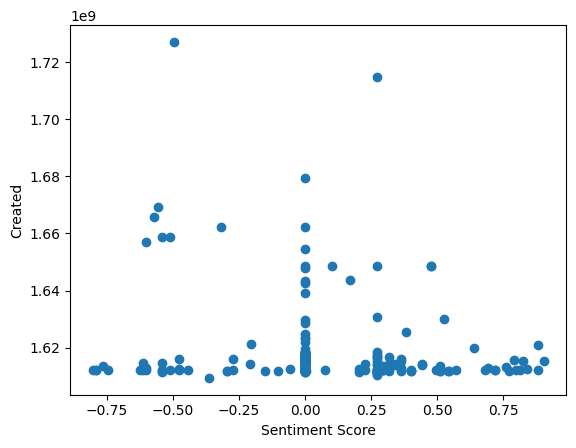

In [48]:
# Plot sentiment vs created
plt.scatter(merged_df['Sentiment_Score'], merged_df['Created'])
plt.xlabel('Sentiment Score')
plt.ylabel('Created')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
# Prepare features (Sentiment Score) and target (Stock Price Change)
X = merged_df[['Sentiment_Score']]
y = merged_df['Score_x']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Build Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2314710322.6136622
